In [23]:
from google.colab import files


uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload (5).csv


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

Data=pd.read_csv('diabetes_data_upload (5).csv')
Data.describe () 



,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Outcome
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


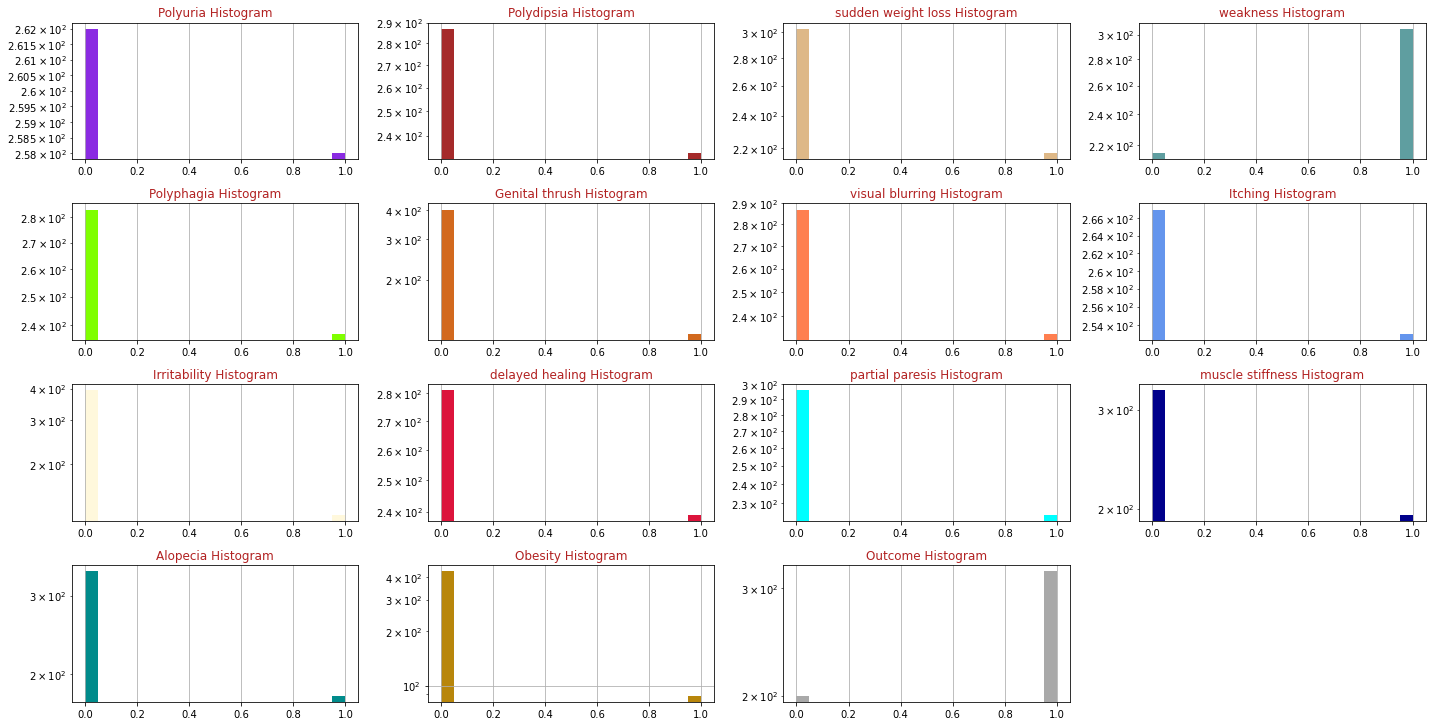

In [25]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

X = Data.iloc[:,Data.columns != 'Outcome']
y = Data.Outcome

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(Data,Data.columns,8,4)

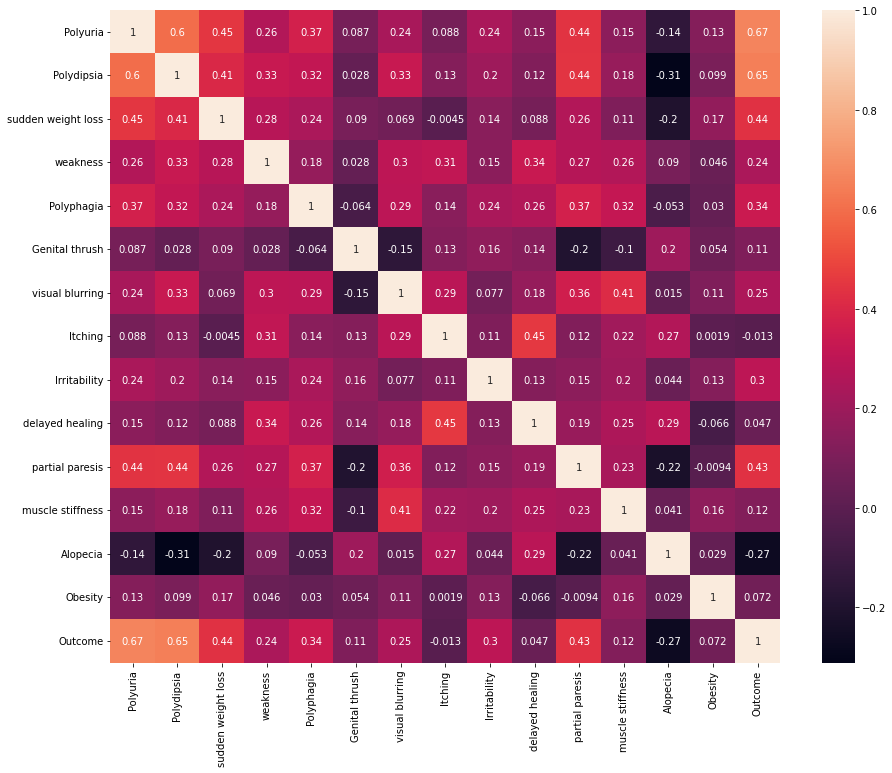

In [31]:
plt.figure(figsize = (15,12))
sns.heatmap(Data.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()


In [32]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
train_acc = model.score(X_train_scaled, y_train)
Y_pred=model.predict(X_test)
Y_pred
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 87.98076923076923


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [33]:
model.predict(X_test[0:10])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, Y_pred))

Precision: 0.615


In [35]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, Y_pred))

Recall: 1.000


In [36]:
from sklearn.metrics import f1_score
print('F1score: %.3f' % f1_score(y_test, Y_pred))

F1score: 0.762


In [37]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, Y_pred))

Accuracy: 0.615


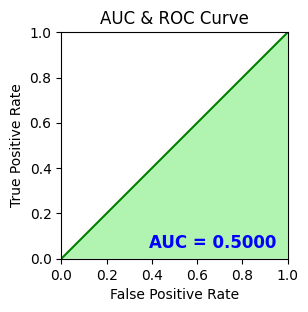

In [41]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, Y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, Y_pred)

plt.figure(figsize=(4, 3), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


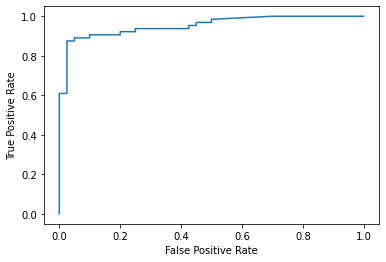

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

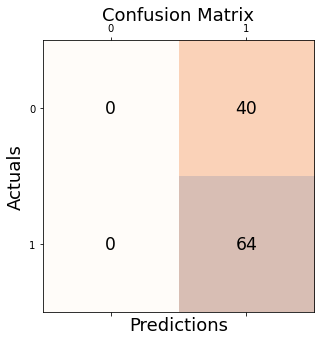

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=Y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()